<a href="https://colab.research.google.com/github/zzf7ktx/ai_workshop/blob/main/ai_workshop_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

## Download

In [13]:
import zipfile
import numpy as np
import pandas as pd

class MovieLens1m:
  def __init__(self):
    self.url = 'https://files.grouplens.org/datasets/movielens/ml-1m.zip'
    self.__download()
    self.__read_users()
    self.__read_movies()
    self.__read_ratings()
    !rm ml-1m.zip
    !rm -rf ml-1m

  def __download(self):
    print('Downloading')
    zip_path = 'ml-1m.zip'
    !wget {self.url} -O {zip_path}

    print('Extracting')
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall()
    self.base_path = 'ml-1m'

  def __read_ratings(self, filename='ratings.dat'):
    print('Reading ratings')
    headers = ['u_nodes', 'v_nodes', 'ratings', 'timestamp']
    dtypes = {
      'u_nodes': np.int64, 'v_nodes': np.int64,
      'ratings': np.float32, 'timestamp': np.float64
    }
    sep = r'\:\:'
    file_path = self.base_path + '/' + filename
    self.ratings_df = pd.read_csv(file_path, sep=sep, header=None,
                                  names=headers,
                                  converters=dtypes, engine='python',
                                  encoding='latin-1')

  def __read_users(self, filename='users.dat'):
    print('Reading users')
    headers = ['user_id', 'gender', 'age', 'occupation', 'zip-code']
    sep = r'\:\:'
    file_path = self.base_path + '/' + filename
    self.users_df = pd.read_csv(file_path, sep=sep,header = None,
                                names = headers, engine= 'python',
                                encoding='latin-1')

  def __read_movies(self, filename='movies.dat'):
    print('Reading movies')
    headers = ['movie_id', 'title', 'genre']
    sep = r'\:\:'
    file_path = self.base_path + '/' + filename
    self.movies_df = pd.read_csv(file_path, sep=sep,header = None,
                                 names = headers, engine= 'python',
                                 encoding='latin-1')

class MovieLens100k:
  def __init__(self):
    self.url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
    self.__download()
    self.__read_users()
    self.__read_movies()
    self.__read_ratings()
    !rm ml-100k.zip
    !rm -rf ml-100k

  def __download(self):
    print('Downloading')
    zip_path = 'ml-100k.zip'
    !wget {self.url} -O {zip_path}

    print('Extracting')
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall()
    self.base_path = 'ml-100k'

  def __read_ratings(self, filename='u.data'):
    print('Reading ratings')
    headers = ['u_nodes', 'v_nodes', 'ratings', 'timestamp']
    dtypes = {
      'u_nodes': np.int64, 'v_nodes': np.int64,
      'ratings': np.float32, 'timestamp': np.float64
    }
    sep = r'\t'
    file_path = self.base_path + '/' + filename
    self.ratings_df = pd.read_csv(file_path, sep=sep, header=None,
                                  names=headers,
                                  converters=dtypes, engine='python',
                                  encoding='latin-1')

  def __read_users(self, filename='u.user'):
    print('Reading users')
    headers = ['user_id', 'age', 'gender', 'occupation', 'zip-code']
    sep = r'|'
    file_path = self.base_path + '/' + filename
    self.users_df = pd.read_csv(file_path, sep=sep,header = None,
                                names = headers, engine= 'python',
                                encoding='latin-1')

  def __read_movies(self, filename='u.item'):
    print('Reading movies')
    headers = ['movie_id', 'title', 'release date', 'video release date',
               'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
               'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
               'Thriller', 'War', 'Western']
    sep = r'|'
    file_path = self.base_path + '/' + filename
    self.movies_df = pd.read_csv(file_path, sep=sep,header = None,
                                 names = headers, engine= 'python',
                                 encoding='latin-1')

In [14]:
dataset = MovieLens100k()

Downloading
--2025-07-10 01:27:48--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  14.4MB/s    in 0.3s    

2025-07-10 01:27:48 (14.4 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Extracting
Reading users
Reading movies
Reading ratings


## Analysis

In [38]:
dataset.movies_df.head()

,movie_id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
dataset.ratings_df.isna().sum()

,0
u_nodes,0
v_nodes,0
ratings,0
timestamp,0


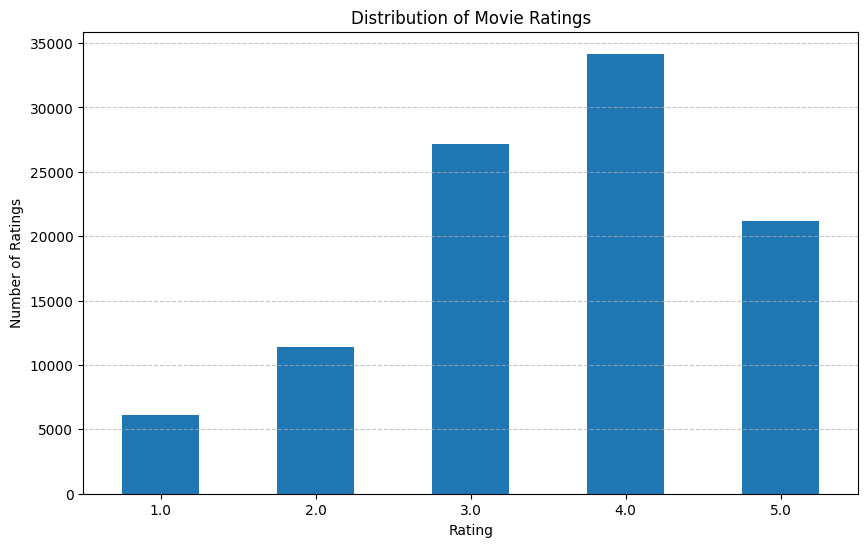

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dataset.ratings_df['ratings'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

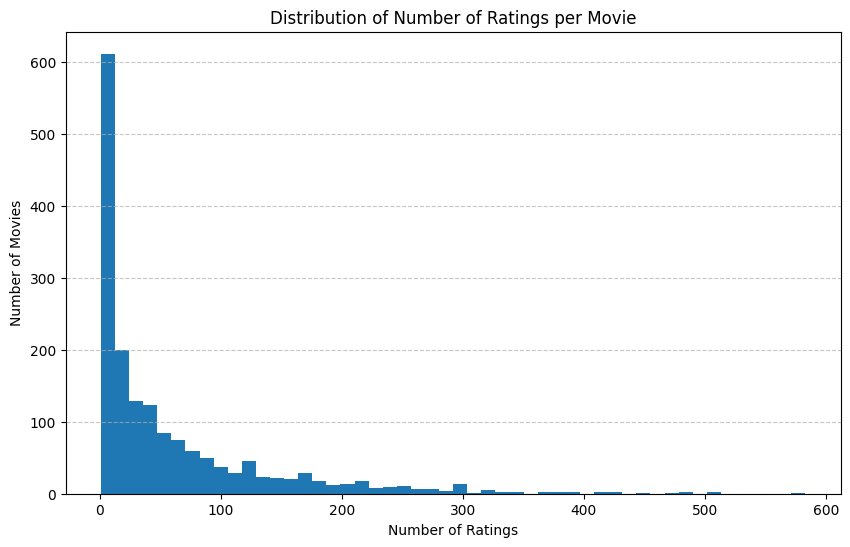

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dataset.ratings_df['v_nodes'].value_counts().plot(kind='hist', bins=50)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

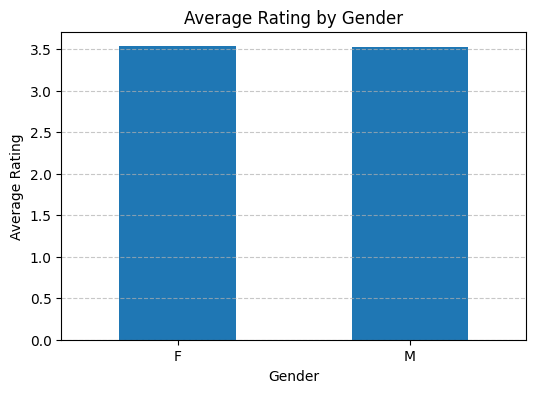

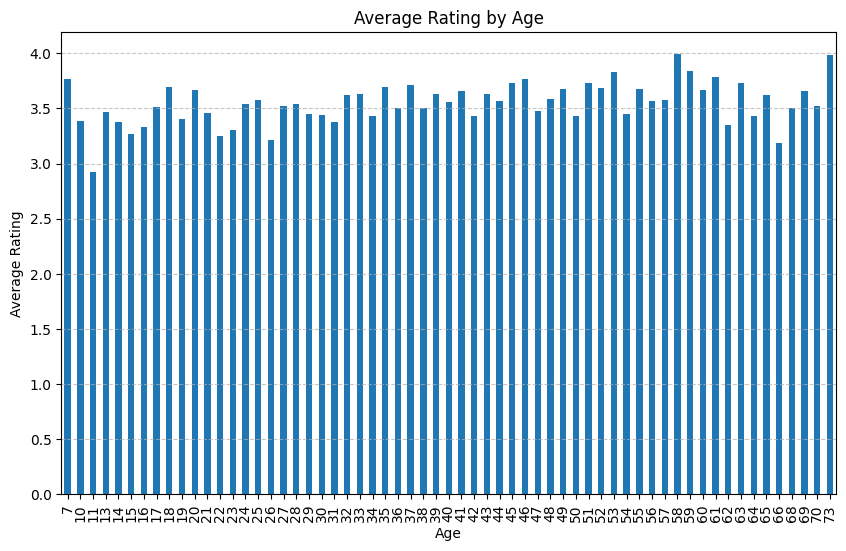

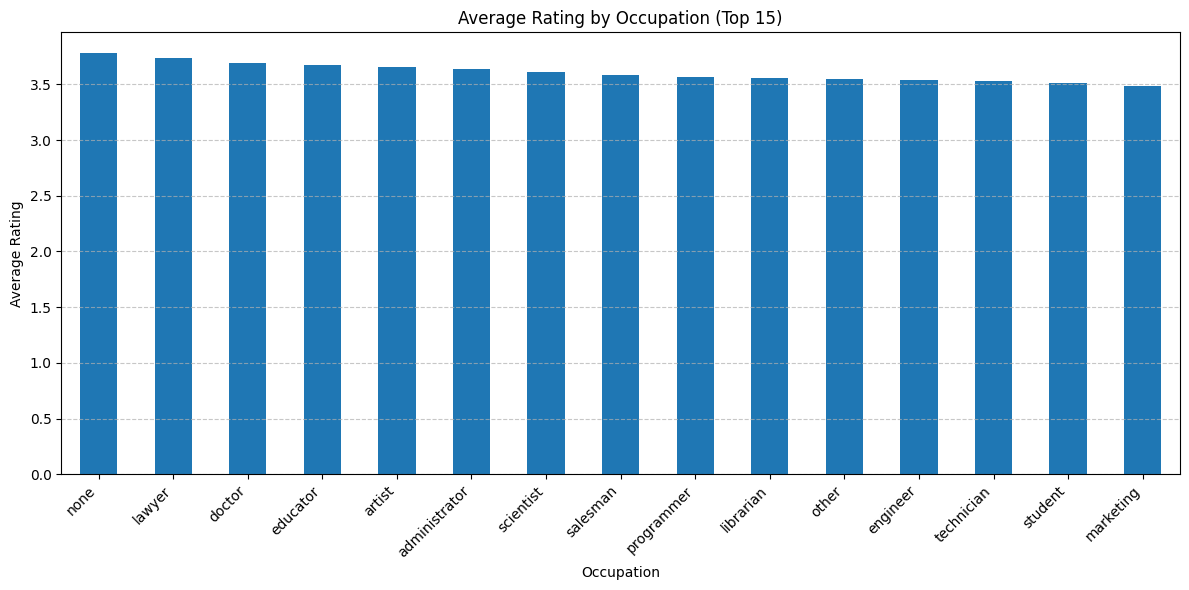

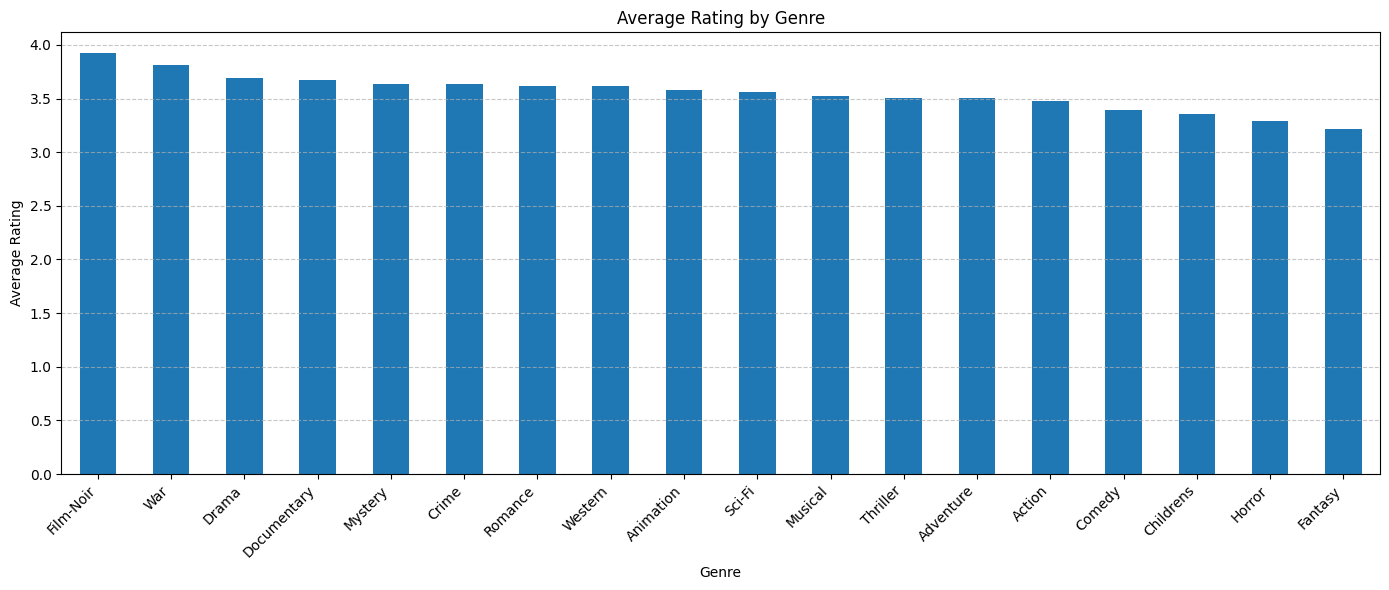

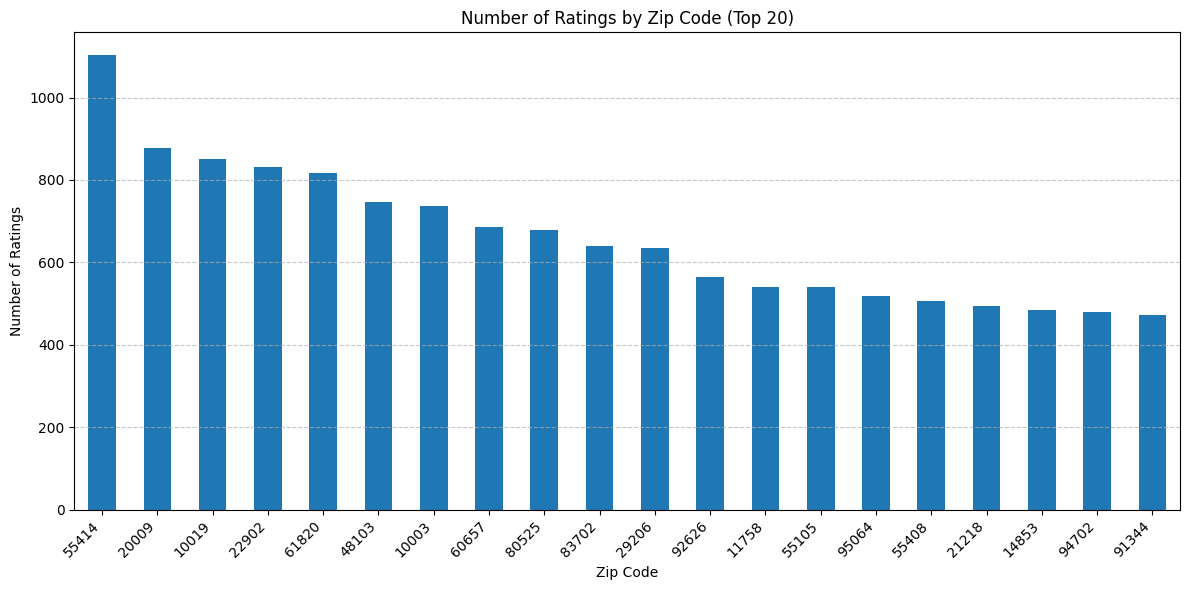

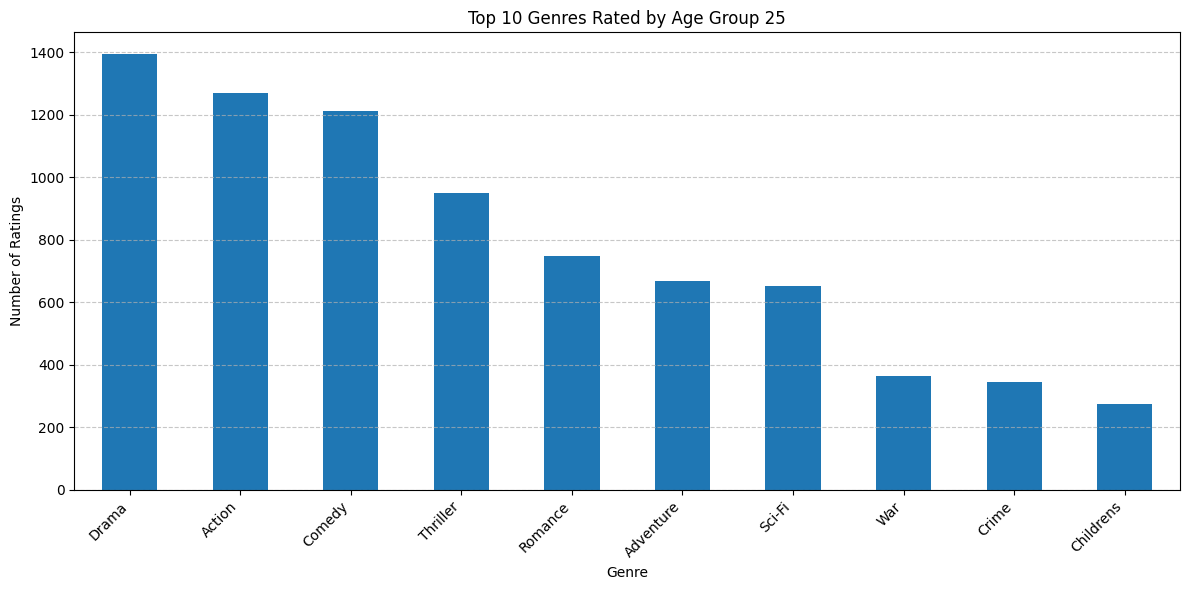

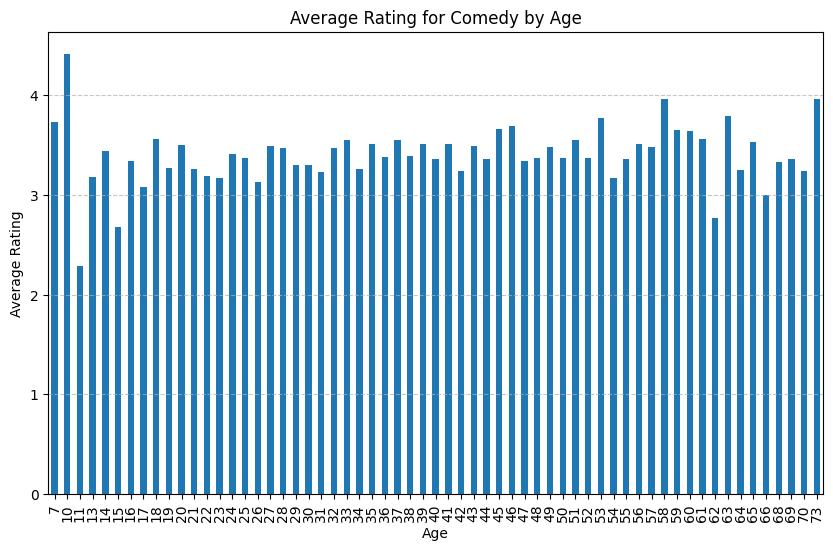

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
# Merge the dataframes
merged_df = pd.merge(dataset.ratings_df, dataset.users_df, left_on='u_nodes', right_on='user_id')
merged_df = pd.merge(merged_df, dataset.movies_df, left_on='v_nodes', right_on='movie_id')

# Drop redundant columns
merged_df = merged_df.drop(['u_nodes', 'v_nodes', 'timestamp', 'user_id', 'movie_id'], axis=1)

# Explore relationships between features and ratings
plt.figure(figsize=(6, 4))
merged_df.groupby('gender')['ratings'].mean().plot(kind='bar')
plt.title('Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
merged_df.groupby('age')['ratings'].mean().plot(kind='bar')
plt.title('Average Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
merged_df.groupby('occupation')['ratings'].mean().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Average Rating by Occupation (Top 15)')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Get genre columns from the original movies_df
genre_cols = dataset.movies_df.columns[6:]

# Melt the genre columns to have one row per genre per movie
genre_ratings = merged_df.melt(id_vars=['ratings', 'age', 'gender', 'occupation', 'zip-code'],
                               value_vars=genre_cols, var_name='genre', value_name='is_genre')

# Filter out rows where the movie does not belong to the genre
genre_ratings = genre_ratings[genre_ratings['is_genre'] == 1]

plt.figure(figsize=(14, 6))
genre_ratings.groupby('genre')['ratings'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
merged_df['zip-code'].value_counts().head(20).plot(kind='bar')
plt.title('Number of Ratings by Zip Code (Top 20)')
plt.xlabel('Zip Code')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


age_group = 25

age_group_genres = genre_ratings[genre_ratings['age'] == age_group]

plt.figure(figsize=(12, 6))
age_group_genres['genre'].value_counts().head(10).plot(kind='bar')
plt.title(f'Top 10 Genres Rated by Age Group {age_group}')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

specific_genre = 'Comedy'
genre_age_ratings = genre_ratings[genre_ratings['genre'] == specific_genre].groupby('age')['ratings'].mean()

plt.figure(figsize=(10, 6))
genre_age_ratings.plot(kind='bar')
plt.title(f'Average Rating for {specific_genre} by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Model

## MF

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataset.ratings_df, test_size=0.1, random_state=42)

In [16]:
# Calculate the mean rating for each movie in the training data
movie_mean_ratings = train_df.groupby('v_nodes')['ratings'].mean()
user_item_matrix = train_df.pivot_table(index='u_nodes', columns='v_nodes', values='ratings')
user_item_matrix = user_item_matrix.fillna(movie_mean_ratings)
user_item_matrix = user_item_matrix.fillna(0)

In [17]:
import numpy as np
from sklearn.decomposition import NMF

nmf = NMF(n_components=10, init='random', random_state=12)
W = nmf.fit_transform(user_item_matrix)
H = nmf.components_

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [18]:
predicted_matrix = np.dot(W, H)

In [19]:
user_item_matrix_test = test_df.pivot_table(index='u_nodes', columns='v_nodes', values='ratings').fillna(0)

In [20]:
user_index_map = {user_id: idx for idx, user_id in enumerate(user_item_matrix.index)}
movie_index_map = {movie_id: idx for idx, movie_id in enumerate(user_item_matrix.columns)}

In [21]:
def predict_rating(user_id, movie_id):
    if user_id in user_index_map and movie_id in movie_index_map:
        u_idx = user_index_map[user_id]
        m_idx = movie_index_map[movie_id]
        return predicted_matrix[u_idx, m_idx]
    else:
        return np.nan  # or a default value

test_df['predicted'] = test_df.apply(lambda row: predict_rating(row['u_nodes'], row['v_nodes']), axis=1)

In [22]:
from sklearn.metrics import mean_squared_error

mask = ~test_df['predicted'].isna()
rmse = np.sqrt(mean_squared_error(test_df.loc[mask, 'ratings'], test_df.loc[mask, 'predicted']))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.9696


In [24]:
def average_precision_at_k(predictions, k):
  predictions.sort(key=lambda x: x[0], reverse=True)
  score = 0.0
  num_hits = 0.0

  for i, (predicted_score, actual_rating) in enumerate(predictions[:k]):
    if actual_rating >= 4:  # Define relevance threshold
      num_hits += 1.0
      score += num_hits / (i + 1.0)

  total_relevant = sum(1 for _, actual_rating in predictions if actual_rating >= 4)
  if total_relevant == 0:
    return 0.0
  return score / min(total_relevant, k)

In [45]:
k=10
grouped = test_df[mask].groupby('u_nodes')

ap_scores = []
for user_id, group in grouped:
  predictions_list = [(row['predicted'], row['ratings']) for _, row in group.iterrows()]
  ap = average_precision_at_k(predictions_list, k=k)
  ap_scores.append(ap)

map_k = sum(ap_scores) / len(ap_scores)
print(f"mAP@{k}: {map_k:.4f}")

mAP@10: 0.7412


## IGMC

### Install

In [28]:
%%capture
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.6.0+cu124.html
!pip install torch-geometric

In [29]:
from __future__ import print_function
import numpy as np
import random
import pandas as pd
from tqdm import tqdm
import os, sys, pdb, math, time
from copy import deepcopy
import multiprocessing as mp
import networkx as nx
import argparse
import scipy.io as sio
import scipy.sparse as ssp
import torch
from torch_geometric.data import Data, Dataset, InMemoryDataset
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')
import pickle as pkl
import scipy.sparse as sp
from torch_geometric.data import DataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Construct data

In [30]:
class SparseRowIndexer:
  def __init__(self, csr_matrix):
    data = []
    indices = []
    indptr = []

    for row_start, row_end in zip(csr_matrix.indptr[:-1], csr_matrix.indptr[1:]):
      data.append(csr_matrix.data[row_start:row_end])
      indices.append(csr_matrix.indices[row_start:row_end])
      indptr.append(row_end - row_start)  # nnz of the row

    self.data = np.array(data, dtype=object)
    self.indices = np.array(indices, dtype=object)
    self.indptr = np.array(indptr, dtype=object)
    self.shape = csr_matrix.shape

  def __getitem__(self, row_selector):
    indices = np.concatenate(self.indices[row_selector])
    data = np.concatenate(self.data[row_selector])
    indptr = np.append(0, np.cumsum(self.indptr[row_selector]))
    shape = [indptr.shape[0] - 1, self.shape[1]]
    return ssp.csr_matrix((data, indices, indptr), shape=shape)

class SparseColIndexer:
  def __init__(self, csc_matrix):
    data = []
    indices = []
    indptr = []

    for col_start, col_end in zip(csc_matrix.indptr[:-1], csc_matrix.indptr[1:]):
        data.append(csc_matrix.data[col_start:col_end])
        indices.append(csc_matrix.indices[col_start:col_end])
        indptr.append(col_end - col_start)

    self.data = np.array(data, dtype=object)
    self.indices = np.array(indices, dtype=object)
    self.indptr = np.array(indptr, dtype=object)
    self.shape = csc_matrix.shape

  def __getitem__(self, col_selector):
    indices = np.concatenate(self.indices[col_selector])
    data = np.concatenate(self.data[col_selector])
    indptr = np.append(0, np.cumsum(self.indptr[col_selector]))

    shape = [self.shape[0], indptr.shape[0] - 1]
    return ssp.csc_matrix((data, indices, indptr), shape=shape)

class MyDataset(InMemoryDataset):
  def __init__(self, root, A, links, labels, h, sample_ratio, max_nodes_per_hop,
               u_features, v_features, class_values, max_num=None, parallel=True):
    self.Arow = SparseRowIndexer(A)
    self.Acol = SparseColIndexer(A.tocsc())
    self.links = links
    self.labels = labels
    self.h = h
    self.sample_ratio = sample_ratio
    self.max_nodes_per_hop = max_nodes_per_hop
    self.u_features = u_features
    self.v_features = v_features
    self.class_values = class_values
    self.parallel = parallel
    self.max_num = max_num
    if max_num is not None:
      np.random.seed(123)
      num_links = len(links[0])
      perm = np.random.permutation(num_links)
      perm = perm[:max_num]
      self.links = (links[0][perm], links[1][perm])
      self.labels = labels[perm]
    super(MyDataset, self).__init__(root)
    self.data, self.slices = torch.load(self.processed_paths[0])

  @property
  def processed_file_names(self):
    name = 'data.pt'
    if self.max_num is not None:
      name = 'data_{}.pt'.format(self.max_num)
    return [name]

  def process(self):
    # Extract enclosing subgraphs and save to disk
    data_list = links2subgraphs(self.Arow, self.Acol, self.links, self.labels, self.h,
                                self.sample_ratio, self.max_nodes_per_hop,
                                self.u_features, self.v_features,
                                self.class_values, self.parallel)

    data, slices = self.collate(data_list)
    torch.save((data, slices), self.processed_paths[0])
    del data_list


class MyDynamicDataset(Dataset):
  def __init__(self, root, A, links, labels, h, sample_ratio, max_nodes_per_hop,
               u_features, v_features, class_values, max_num=None):
    super(MyDynamicDataset, self).__init__(root)
    self.Arow = SparseRowIndexer(A)
    self.Acol = SparseColIndexer(A.tocsc())
    self.links = links
    self.labels = labels
    self.h = h
    self.sample_ratio = sample_ratio
    self.max_nodes_per_hop = max_nodes_per_hop
    self.u_features = u_features
    self.v_features = v_features
    self.class_values = class_values
    if max_num is not None:
      np.random.seed(123)
      num_links = len(links[0])
      perm = np.random.permutation(num_links)
      perm = perm[:max_num]
      self.links = (links[0][perm], links[1][perm])
      self.labels = labels[perm]

  def len(self):
    return self.__len__()

  def __len__(self):
    return len(self.links[0])

  def get(self, idx):
    i, j = self.links[0][idx], self.links[1][idx]
    g_label = self.labels[idx]
    tmp = subgraph_extraction_labeling(
        (i, j), self.Arow, self.Acol, self.h, self.sample_ratio, self.max_nodes_per_hop,
        self.u_features, self.v_features, self.class_values, g_label
    )
    return construct_pyg_graph(*tmp)


def links2subgraphs(Arow,
                    Acol,
                    links,
                    labels,
                    h=1,
                    sample_ratio=1.0,
                    max_nodes_per_hop=None,
                    u_features=None,
                    v_features=None,
                    class_values=None,
                    parallel=True):
  # extract enclosing subgraphs
  print('Enclosing subgraph extraction begins...')
  g_list = []
  if not parallel:
    with tqdm(total=len(links[0])) as pbar:
      for i, j, g_label in zip(links[0], links[1], labels):
        tmp = subgraph_extraction_labeling(
            (i, j), Arow, Acol, h, sample_ratio, max_nodes_per_hop, u_features,
            v_features, class_values, g_label
        )
        data = construct_pyg_graph(*tmp)
        g_list.append(data)
        pbar.update(1)
  else:
    start = time.time()
    pool = mp.Pool(mp.cpu_count())
    results = pool.starmap_async(
        subgraph_extraction_labeling,
        [
            ((i, j), Arow, Acol, h, sample_ratio, max_nodes_per_hop, u_features,
             v_features, class_values, g_label)
            for i, j, g_label in zip(links[0], links[1], labels)
        ]
    )
    remaining = results._number_left
    pbar = tqdm(total=remaining)
    while True:
      pbar.update(remaining - results._number_left)
      if results.ready(): break
      remaining = results._number_left
      time.sleep(1)
    results = results.get()
    pool.close()
    pbar.close()
    end = time.time()
    print("Time elapsed for subgraph extraction: {}s".format(end-start))
    print("Transforming to pytorch_geometric graphs...")
    g_list = []
    pbar = tqdm(total=len(results))
    while results:
      tmp = results.pop()
      g_list.append(construct_pyg_graph(*tmp))
      pbar.update(1)
    pbar.close()
    end2 = time.time()
    print("Time elapsed for transforming to pytorch_geometric graphs: {}s".format(end2-end))
  return g_list

def subgraph_extraction_labeling(ind, Arow, Acol, h=1, sample_ratio=1.0, max_nodes_per_hop=None,
                                 u_features=None, v_features=None, class_values=None,
                                 y=1):
  # extract the h-hop enclosing subgraph around link 'ind'
  u_nodes, v_nodes = [ind[0]], [ind[1]]
  u_dist, v_dist = [0], [0]
  u_visited, v_visited = set([ind[0]]), set([ind[1]])
  u_fringe, v_fringe = set([ind[0]]), set([ind[1]])
  for dist in range(1, h+1):
    v_fringe, u_fringe = neighbors(u_fringe, Arow), neighbors(v_fringe, Acol)
    u_fringe = u_fringe - u_visited
    v_fringe = v_fringe - v_visited
    u_visited = u_visited.union(u_fringe)
    v_visited = v_visited.union(v_fringe)
    if sample_ratio < 1.0:
      u_fringe = random.sample(u_fringe, int(sample_ratio*len(u_fringe)))
      v_fringe = random.sample(v_fringe, int(sample_ratio*len(v_fringe)))
    if max_nodes_per_hop is not None:
      if max_nodes_per_hop < len(u_fringe):
        u_fringe = random.sample(list(u_fringe), max_nodes_per_hop)
      if max_nodes_per_hop < len(v_fringe):
        v_fringe = random.sample(list(v_fringe), max_nodes_per_hop)
    if len(u_fringe) == 0 and len(v_fringe) == 0:
      break
    u_nodes = u_nodes + list(u_fringe)
    v_nodes = v_nodes + list(v_fringe)
    u_dist = u_dist + [dist] * len(u_fringe)
    v_dist = v_dist + [dist] * len(v_fringe)
  subgraph = Arow[u_nodes][:, v_nodes]
  # remove link between target nodes
  subgraph[0, 0] = 0

  # prepare pyg graph constructor input
  u, v, r = ssp.find(subgraph)  # r is 1, 2... (rating labels + 1)
  v += len(u_nodes)
  r = r - 1  # transform r back to rating label
  num_nodes = len(u_nodes) + len(v_nodes)
  node_labels = [x*2 for x in u_dist] + [x*2+1 for x in v_dist]
  max_node_label = 2*h + 1
  y = class_values[y]

  # get node features
  if u_features is not None:
    u_features = u_features[u_nodes]
  if v_features is not None:
    v_features = v_features[v_nodes]
  node_features = None
  if False:
    # directly use padded node features
    if u_features is not None and v_features is not None:
      u_extended = np.concatenate(
          [u_features, np.zeros([u_features.shape[0], v_features.shape[1]])], 1
      )
      v_extended = np.concatenate(
          [np.zeros([v_features.shape[0], u_features.shape[1]]), v_features], 1
      )
      node_features = np.concatenate([u_extended, v_extended], 0)
  if False:
    # use identity features (one-hot encodings of node idxes)
    u_ids = one_hot(u_nodes, Arow.shape[0] + Arow.shape[1])
    v_ids = one_hot([x+Arow.shape[0] for x in v_nodes], Arow.shape[0] + Arow.shape[1])
    node_ids = np.concatenate([u_ids, v_ids], 0)
    #node_features = np.concatenate([node_features, node_ids], 1)
    node_features = node_ids
  if True:
    # only output node features for the target user and item
    if u_features is not None and v_features is not None:
      node_features = [u_features[0], v_features[0]]

  return u, v, r, node_labels, max_node_label, y, node_features

def construct_pyg_graph(u, v, r, node_labels, max_node_label, y, node_features):
    u, v = torch.LongTensor(u), torch.LongTensor(v)
    r = torch.LongTensor(r)
    edge_index = torch.stack([torch.cat([u, v]), torch.cat([v, u])], 0)
    edge_type = torch.cat([r, r])
    x = torch.FloatTensor(one_hot(node_labels, max_node_label+1))
    y = torch.FloatTensor([y])
    data = Data(x, edge_index, edge_type=edge_type, y=y)

    if node_features is not None:
        if type(node_features) == list:  # a list of u_feature and v_feature
            u_feature, v_feature = node_features
            data.u_feature = torch.FloatTensor(u_feature).unsqueeze(0)
            data.v_feature = torch.FloatTensor(v_feature).unsqueeze(0)
        else:
            x2 = torch.FloatTensor(node_features)
            data.x = torch.cat([data.x, x2], 1)
    return data


def neighbors(fringe, A):
  # find all 1-hop neighbors of nodes in fringe from A
  if not fringe:
    return set([])
  return set(A[list(fringe)].indices)

def one_hot(idx, length):
  idx = np.array(idx)
  x = np.zeros([len(idx), length])
  x[np.arange(len(idx)), idx] = 1.0
  return x

def PyGGraph_to_nx(data):
  edges = list(zip(data.edge_index[0, :].tolist(), data.edge_index[1, :].tolist()))
  g = nx.from_edgelist(edges)
  g.add_nodes_from(range(len(data.x)))  # in case some nodes are isolated
  # transform r back to rating label
  edge_types = {(u, v): data.edge_type[i].item() for i, (u, v) in enumerate(edges)}
  nx.set_edge_attributes(g, name='type', values=edge_types)
  node_types = dict(zip(range(data.num_nodes), torch.argmax(data.x, 1).tolist()))
  nx.set_node_attributes(g, name='type', values=node_types)
  g.graph['rating'] = data.y.item()
  return g

### Define Model

In [31]:
import torch.nn as nn
from torch.nn import Linear, Conv1d
from torch_geometric.nn import GCNConv, RGCNConv, global_sort_pool, global_add_pool
from torch_geometric.utils import dropout_edge
import pdb

class GNN(torch.nn.Module):
  # a base GNN class, GCN message passing + sum_pooling
  def __init__(self, dataset, gconv = GCNConv, latent_dim=[32, 32, 32, 1],
               regression = False, adj_dropout = 0.2,
               force_undirected = False):
    super(GNN, self).__init__()
    self.regression = regression
    self.adj_dropout = adj_dropout
    self.force_undirected = force_undirected
    self.convs = torch.nn.ModuleList()
    self.convs.append(gconv(4, latent_dim[0]))
    for i in range(0, len(latent_dim)-1):
      self.convs.append(gconv(latent_dim[i], latent_dim[i+1]))
    self.lin1 = Linear(sum(latent_dim), 128)
    if self.regression:
      self.lin2 = Linear(128, 1)
    else:
      self.lin2 = Linear(128, dataset.num_classes)

  def reset_parameters(self):
    for conv in self.convs:
      conv.reset_parameters()
    self.lin1.reset_parameters()
    self.lin2.reset_parameters()

  def forward(self, data):
    x, edge_index, batch = data.x, data.edge_index, data.batch
    if self.adj_dropout > 0:
      edge_index, _ = dropout_edge(edge_index, p=self.adj_dropout,
                                   force_undirected=self.force_undirected,
                                   num_nodes=len(x), training=self.training)
    concat_states = []
    for conv in self.convs:
      x = torch.tanh(conv(x, edge_index))
      concat_states.append(x)
    concat_states = torch.cat(concat_states, 1)
    x = global_add_pool(concat_states, batch)
    x = F.relu(self.lin1(x))
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.lin2(x)
    if self.regression:
      return x[:, 0]
    else:
      return F.log_softmax(x, dim=-1)

  def __repr__(self):
    return self.__class__.__name__

class IGMC(GNN):
  # The GNN model of Inductive Graph-based Matrix Completion.
  # Use RGCN convolution + center-nodes readout.
  def __init__(self, dataset, gconv=RGCNConv, latent_dim=[32, 32, 32, 32],
               num_relations=5, num_bases=2, regression=False, adj_dropout=0.2,
               force_undirected=False, side_features=False, n_side_features=0,
               multiply_by=1):
    super(IGMC, self).__init__(dataset, GCNConv, latent_dim,
                               regression, adj_dropout, force_undirected
    )
    self.multiply_by = multiply_by
    self.convs = torch.nn.ModuleList()
    self.convs.append(gconv(4, latent_dim[0], num_relations, num_bases))
    for i in range(0, len(latent_dim)-1):
      self.convs.append(gconv(latent_dim[i], latent_dim[i+1], num_relations, num_bases))
    self.lin1 = Linear(2*sum(latent_dim), 128)
    self.side_features = side_features
    if side_features:
      self.lin1 = Linear(2*sum(latent_dim)+n_side_features, 128)

  def forward(self, data):
    start = time.time()
    x, edge_index, edge_type, batch = data.x, data.edge_index, data.edge_type, data.batch
    if self.adj_dropout > 0:
      edge_index, edge_mask = dropout_edge(edge_index, p=self.adj_dropout,
                                           force_undirected=self.force_undirected,
                                           training=self.training)
      edge_type = data.edge_type[edge_mask]
    concat_states = []
    for conv in self.convs:
      x = torch.tanh(conv(x, edge_index, edge_type))
      concat_states.append(x)
    concat_states = torch.cat(concat_states, 1)

    users = data.x[:, 0] == 1
    items = data.x[:, 1] == 1
    x = torch.cat([concat_states[users], concat_states[items]], 1)
    if self.side_features:
      x = torch.cat([x, data.u_feature, data.v_feature], 1)

    x = F.relu(self.lin1(x))
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.lin2(x)
    if self.regression:
      return x[:, 0] * self.multiply_by
    else:
      return F.log_softmax(x, dim=-1)

### Training utilities

In [32]:
import torch.nn.functional as F
from torch.optim import Adam

def train(model, optimizer, loader, device, regression = False, ARR = 0, show_progress= False, epoch = None):
  model.train()
  total_loss = 0
  if show_progress:
    pbar = tqdm(loader)
  else:
    pbar = loader
  for data in pbar:
    optimizer.zero_grad()
    data = data.to(device)
    out = model(data)
    if regression:
      loss = F.mse_loss(out, data.y.view(-1))
    else:
      loss = F.nll_loss(out, data.y.view(-1))
    if show_progress:
      pbar.set_description('Epoch {}, batch loss: {}'.format(epoch, loss.item()))
    if ARR != 0:
      for gconv in model.convs:
        w = torch.matmul(gconv.comp,
                         gconv.weight.view(gconv.num_bases, -1)
        ).view(gconv.num_relations, gconv.in_channels, gconv.out_channels)
        reg_loss = torch.sum((w[1:, :, :] - w[:-1, :, :])**2)
        loss += ARR * reg_loss
    loss.backward()
    total_loss += loss.item() * num_graphs(data)
    optimizer.step()
  return total_loss / len(loader.dataset)

def eval_loss(model, loader, device, regression=False, show_progress= False):
  model.eval()
  loss = 0
  if show_progress:
    print('Testing begins ...')
    pbar = tqdm(loader)
  else:
    pbar = loader
  for data in pbar:
    data = data.to(device)
    with torch.no_grad():
      out = model(data)
    if regression:
      loss += F.mse_loss(out, data.y.view(-1), reduction='sum').item()
    else:
      loss += F.nll_loss(out, data.y.view(-1), reduction='sum').item()
    torch.cuda.empty_cache()
  return loss / len(loader.dataset)

def eval_rmse(model, loader, device, show_progress = False):
  mse_loss = eval_loss(model, loader, device, True, show_progress)
  rmse = math.sqrt(mse_loss)
  return rmse

def eval_loss_ensemble(model, checkpoints, loader, device, regression = False, show_progress = False):
  loss = 0
  Outs = []
  ys = []
  for i, checkpoint in enumerate(checkpoints):
    if show_progress:
      print('Testing begins...')
      pbar = tqdm(loader)
    else:
      pbar = loader
    model.load_state_dict(torch.load(checkpoint))
    model.eval()
    outs = []
    if i == 0:
      ys = []
    for data in pbar:
      data = data.to(device)
      if i == 0:
        ys.append(data.y.view(-1))
      with torch.no_grad():
        out = model(data)
        outs.append(out)
    if i == 0:
      ys = torch.cat(ys, 0)
    outs = torch.cat(outs, 0).view(-1 , 1)
    Outs.append(outs)
  Outs = torch.cat(Outs, 1).mean(1)
  if regression:
    loss += F.mse_loss(Outs, ys, reduction='sum').item()
  else:
    loss += F.nll_loss(Outs, ys, reduction='sum').item()

  return loss / len(loader.dataset)

def eval_rmse_ensemble(model, checkpoints, loader, device, show_progress = False):
  mse_loss = eval_loss_ensemble(model ,checkpoints, loader, device, True, show_progress = False)
  rmse = math.sqrt(mse_loss)
  return rmse

In [33]:
def train_multiple_epochs(train_dataset, test_dataset, model,
                          epochs, batch_size, lr, lr_decay_factor,
                          lr_decay_step_size, weight_decay, ARR = 0,
                          test_freq = 1, logger = None, continue_from = None,
                          res_dir = None, cpu_only = False):
  rmses = []

  if train_dataset.__class__.__name__ == 'MyDynamicDataset':
    num_workers = mp.cpu_count()
  else:
    num_workers = 2

  train_loader = DataLoader(train_dataset, batch_size, shuffle = True, num_workers = num_workers)

  if test_dataset.__class__.__name__ == 'MyDynamicDataset':
    num_workers = mp.cpu_count()
  else:
    num_workers = 2

  test_loader = DataLoader(test_dataset, batch_size, shuffle = False, num_workers = num_workers)

  model.to(device).reset_parameters()
  optimizer = Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
  start_epoch = 1
  if continue_from is not None:
    if(cpu_only):
      model.load_state_dict(
        torch.load(
            os.path.join(res_dir, 'model_checkpoint{}.pth'.format(continue_from)),
            map_location=torch.device('cpu')
            )
      )
      optimizer.load_state_dict(
          torch.load(
              os.path.join(res_dir, 'optimizer_checkpoint{}.pth'.format(continue_from)),
              map_location=torch.device('cpu')
              )
      )
    else:
      model.load_state_dict(
        torch.load(os.path.join(res_dir, 'model_checkpoint{}.pth'.format(continue_from)))
      )
      optimizer.load_state_dict(
          torch.load(os.path.join(res_dir, 'optimizer_checkpoint{}.pth'.format(continue_from)))
      )

    start_epoch = continue_from + 1
    epochs -= continue_from
  if torch.cuda.is_available():
    torch.cuda.synchronize()

  # batch_pbar = len(train_dataset) >= 100000
  batch_pbar = True
  t_start = time.perf_counter()
  if not batch_pbar:
    pbar = tqdm(range(start_epoch, epochs + start_epoch))
  else:
    pbar = range(start_epoch, epochs + start_epoch)
  for epoch in pbar:
    train_loss = train(model, optimizer, train_loader, device, regression = True,
                       ARR = ARR, show_progress = batch_pbar, epoch=epoch)
    if epoch % test_freq == 0:
      rmses.append(eval_rmse(model, test_loader, device, show_progress = batch_pbar))
    else:
      rmses.append(np.nan)
    eval_info = {
      'epoch': epoch,
      'train_loss': train_loss,
      'test_rmse': rmses[-1],
    }

    if not batch_pbar:
      pbar.set_description(
          'Epoch {}, train loss {:.6f}, test rmse {:.6f}'.format(*eval_info.values())
      )
    else:
      print('Epoch {}, train loss {:.6f}, test rmse {:.6f}'.format(*eval_info.values()))

    if epoch % lr_decay_step_size == 0:
      for param_group in optimizer.param_groups:
        param_group['lr'] = lr_decay_factor * param_group['lr']

    if logger is not None:
      logger(eval_info, model, optimizer)

  t_end = time.perf_counter()
  duration = t_end - t_start

  print('Final Test RMSE: {:.6f}, Duration: {:.6f}'.format(rmses[-1], duration))

  return rmses[-1]

def test_once(test_dataset, model, batch_size, logger = None, ensemble = False, checkpoints = None):
  test_loader = DataLoader(test_dataset, batch_size, shuffle = False)
  model.to(device)
  t_start = time.perf_counter()
  if ensemble and checkpoints:
    rmse = eval_rmse_ensemble(model, checkpoints, test_loader, device, show_progress = True)
  else:
    rmse = eval_rmse(model, test_loader, device, show_progress = True)

  t_end = time.perf_counter()
  duration = t_end - t_start
  print('Test Once RMSE: {:.6f}, Duration: {:.6f}'.format(rmse, duration))
  epoch_info = 'test_once' if not ensemble else 'ensemble'
  eval_info = {
      'epoch': epoch_info,
      'train_loss': 0,
      'test_rmse': rmse,
  }

  if logger is not None:
    logger(eval_info, None, None)

  return rmse

def num_graphs(data):
  if data.batch is not None:
    return data.num_graphs
  else:
    return data.x.size(0)

### Load and split data

In [34]:
import numpy as np
import pandas as pd
import random
import scipy.sparse as sp

def map_data(data):
  uniq = list(set(data))
  id_dict = {old: new for new, old in enumerate(sorted(uniq))}
  data = np.array([id_dict[x] for x in data])
  n = len(uniq)

  return data, id_dict, n

def process_data(dataset, seed = 1234, verbose = True):
  num_users, num_items, u_nodes_ratings, v_nodes_ratings, ratings, u_features, v_features = None, None, None, None, None, None, None

  # shuffle
  data_array = dataset.ratings_df.values.tolist()
  random.seed(seed)
  random.shuffle(data_array)
  data_array = np.array(data_array)

  u_nodes_ratings = data_array[:, 0].astype(np.int64)
  v_nodes_ratings = data_array[:, 1].astype(np.int64)
  ratings = data_array[:, 2].astype(np.float32)

  u_nodes_ratings, u_dict, num_users = map_data(u_nodes_ratings)
  v_nodes_ratings, v_dict, num_items = map_data(v_nodes_ratings)

  u_nodes_ratings, v_nodes_ratings = u_nodes_ratings.astype(np.int64), v_nodes_ratings.astype(np.int64)
  ratings = ratings.astype(np.float32)

  # Load movie features
  # Extracting all genres
  if isinstance(dataset, MovieLens1m):
    genres = []
    for s in dataset.movies_df['genre'].values:
      genres.extend(s.split('|'))

    genres = list(set(genres))
    num_genres = len(genres)

    genres_dict = {g: idx for idx, g in enumerate(genres)}

    # Creating 0 or 1 valued features for all genres
    v_features = np.zeros((num_items, num_genres), dtype=np.float32)
    for movie_id, s in zip(dataset.movies_df['movie_id'].values.tolist(), dataset.movies_df['genre'].values.tolist()):
      # Check if movie_id was listed in ratings file and therefore in mapping dictionary
      if movie_id in v_dict.keys():
        gen = s.split('|')
        for g in gen:
          v_features[v_dict[movie_id], genres_dict[g]] = 1.

    # Load user features
    # Extracting all features
    cols = dataset.users_df.columns.values[1:]

    cntr = 0
    feat_dicts = []
    for header in cols:
      #if header == 'zip-code':
      #  continue
      d = dict()
      feats = np.unique(dataset.users_df[header].values).tolist()
      d.update({f: i for i, f in enumerate(feats, start=cntr)})
      feat_dicts.append(d)
      cntr += len(d)

    num_feats = sum(len(d) for d in feat_dicts)

    u_features = np.zeros((num_users, num_feats), dtype=np.float32)
    for _, row in dataset.users_df.iterrows():
      u_id = row['user_id']
      if u_id in u_dict.keys():
        for k, header in enumerate(cols):
            u_features[u_dict[u_id], feat_dicts[k][row[header]]] = 1.
  elif isinstance(dataset, MovieLens100k):
    # Movie features (genres)
    genre_headers = dataset.movies_df.columns.values[6:]
    num_genres = genre_headers.shape[0]

    v_features = np.zeros((num_items, num_genres), dtype=np.float32)
    for movie_id, g_vec in zip(dataset.movies_df['movie_id'].values.tolist(), dataset.movies_df[genre_headers].values.tolist()):
      # Check if movie_id was listed in ratings file and therefore in mapping dictionary
      if movie_id in v_dict.keys():
        v_features[v_dict[movie_id], :] = g_vec

    # User features
    occupation = set(dataset.users_df['occupation'].values.tolist())

    gender_dict = {'M': 0., 'F': 1.}
    occupation_dict = {f: i for i, f in enumerate(occupation, start=2)}

    num_feats = 2 + len(occupation_dict)

    u_features = np.zeros((num_users, num_feats), dtype=np.float32)
    for _, row in dataset.users_df.iterrows():
      u_id = row['user_id']
      if u_id in u_dict.keys():
        # age
        u_features[u_dict[u_id], 0] = row['age']
        # gender
        u_features[u_dict[u_id], 1] = gender_dict[row['gender']]
        # occupation
        u_features[u_dict[u_id], occupation_dict[row['occupation']]] = 1.

  u_features = sp.csr_matrix(u_features)
  v_features = sp.csr_matrix(v_features)

  return num_users, num_items, u_nodes_ratings, v_nodes_ratings, ratings, u_features, v_features

In [35]:
def create_trainvaltest_split(dataset, seed=1212, testing=False,
                              verbose=True, rating_map=None,
                              post_rating_map=None, ratio=1.0):
  num_users, num_items, u_nodes, v_nodes, ratings, u_features, v_features = process_data(dataset, seed=seed, verbose=verbose)

  if rating_map is not None:
    for i, x in enumerate(ratings):
      ratings[i] = rating_map[x]

  rating_dict = {r: i for i, r in enumerate(np.sort(np.unique(ratings)).tolist())}

  # number of test and validation edges

  print("Spliting the dataset ...")
  num_test = int(np.ceil(ratings.shape[0] * 0.1))
  num_val = int(np.ceil(ratings.shape[0] * 0.9 * 0.05))
  num_train = ratings.shape[0] - num_val - num_test

  pairs_nonzero = np.vstack([u_nodes, v_nodes]).transpose()

  train_pairs_idx = pairs_nonzero[0:int(num_train*ratio)]
  val_pairs_idx = pairs_nonzero[num_train:num_train + num_val]
  test_pairs_idx = pairs_nonzero[num_train + num_val:]

  u_test_idx, v_test_idx = test_pairs_idx.transpose()
  u_val_idx, v_val_idx = val_pairs_idx.transpose()
  u_train_idx, v_train_idx = train_pairs_idx.transpose()

  # create labels
  all_labels = np.array([rating_dict[r] for r in ratings], dtype=np.int32)
  train_labels = all_labels[0:int(num_train*ratio)]
  val_labels = all_labels[num_train:num_train + num_val]
  test_labels = all_labels[num_train + num_val:]

  if testing:
    u_train_idx = np.hstack([u_train_idx, u_val_idx])
    v_train_idx = np.hstack([v_train_idx, v_val_idx])
    train_labels = np.hstack([train_labels, val_labels])

  class_values = np.sort(np.unique(ratings))

  # make training adjacency matrix
  if post_rating_map is None:
    data = train_labels + 1.
  else:
    data = np.array([post_rating_map[r] for r in class_values[train_labels]]) + 1.
  data = data.astype(np.float32)

  rating_mx_train = sp.csr_matrix((data, [u_train_idx, v_train_idx]),
                                  shape=[num_users, num_items], dtype=np.float32)

  return u_features, v_features, rating_mx_train, train_labels, u_train_idx, v_train_idx, val_labels, u_val_idx, v_val_idx, test_labels, u_test_idx, v_test_idx, class_values

## Main

In [19]:
dataset1 = dataset
dataset1.ratings_df = dataset1.ratings_df[:100_000]

In [36]:
u_features, v_features, adj_train, train_labels, train_u_indices, train_v_indices, val_labels, val_u_indices, val_v_indices, test_labels, test_u_indices, test_v_indices, class_values = create_trainvaltest_split(dataset, 1212, False, True, None, None, 1.0)

Spliting the dataset ...


In [37]:
train_root = 'ml-1m/train'
val_root = 'ml-1m/val'
test_root = 'ml-1m/test'
if isinstance(dataset, MovieLens1m):
  !mkdir ml-1m ml-1m/train ml-1m/test ml-1m/val
elif isinstance(dataset, MovieLens100k):
  !mkdir ml-100k ml-100k/train ml-100k/test ml-100k/val
  train_root = 'ml-100k/train'
  val_root = 'ml-100k/val'
  test_root = 'ml-100k/test'
train_root, val_root, test_root

('ml-100k/train', 'ml-100k/val', 'ml-100k/test')

In [38]:
train_dataset = eval('MyDynamicDataset')(root=train_root, A=adj_train,
                                         links=(train_u_indices, train_v_indices),
                                         labels=train_labels, h=1, sample_ratio=1,
                                         max_nodes_per_hop=200, u_features=None,
                                         v_features=None, class_values=class_values)
val_dataset = eval('MyDynamicDataset')(root=val_root, A=adj_train,
                                       links=(val_u_indices, val_v_indices),
                                       labels=val_labels, h=1, sample_ratio=1.0,
                                       max_nodes_per_hop=200, u_features=None,
                                       v_features=None, class_values=class_values)
test_dataset = eval('MyDynamicDataset')(root=test_root, A=adj_train,
                                        links=(test_u_indices, test_v_indices),
                                        labels=test_labels, h=1, sample_ratio=1.0,
                                        max_nodes_per_hop=200, u_features=None,
                                        v_features=None, class_values=class_values)

len(train_dataset), len(val_dataset), len(test_dataset)

(85500, 4500, 10000)

In [39]:
num_relations = len(class_values)
multiply_by = 1

model = IGMC(train_dataset, latent_dim = [32, 32, 32, 32],
             num_relations = num_relations, num_bases = 4,
             regression = True, adj_dropout = 0.2, force_undirected = False,
             side_features = False, n_side_features = 0, multiply_by = 1
)

In [40]:
def logger(info, model, optimizer):
  epoch, train_loss, test_rmse = info['epoch'], info['train_loss'], info['test_rmse']
  with open(os.path.join(train_root, 'log.txt'), 'a') as f:
    f.write('Epoch {}, train loss {:.4f}, test rmse {:.6f}\n'.format(epoch, train_loss, test_rmse))
  if type(epoch) == int and epoch % args['save_interval'] == 0:
    print('Saving model states...')
    model_name = os.path.join(train_root, 'model_checkpoint{}.pth'.format(epoch))
    optimizer_name = os.path.join(
        train_root, 'optimizer_checkpoint{}.pth'.format(epoch)
    )
    if model is not None:
      torch.save(model.state_dict(), model_name)
    if optimizer is not None:
      torch.save(optimizer.state_dict(), optimizer_name)

In [41]:
args = {
    'save_interval': 1
}
train_multiple_epochs(
        train_dataset,
        val_dataset,
        model,
        4,
        50,
        1e-3,
        lr_decay_factor = 0.1 ,
        lr_decay_step_size = 20,
        weight_decay = 0,
        ARR = 0.001,
        test_freq = 1,
        logger = logger,
        continue_from = None,
        res_dir= train_root,
        cpu_only = True
    )

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
Epoch 1, batch loss: 0.9641247391700745: 100%|██████████| 1710/1710 [16:27<00:00,  1.73it/s]


Testing begins ...


  0%|          | 0/90 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 90/90 [00:53<00:00,  1.68it/s]


Epoch 1, train loss 1.442910, test rmse 0.958908
Saving model states...


Epoch 2, batch loss: 1.3795132637023926: 100%|██████████| 1710/1710 [16:35<00:00,  1.72it/s]


Testing begins ...


  0%|          | 0/90 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 90/90 [00:42<00:00,  2.11it/s]


Epoch 2, train loss 1.131982, test rmse 0.965672
Saving model states...


Epoch 3, batch loss: 1.105526089668274: 100%|██████████| 1710/1710 [16:23<00:00,  1.74it/s]


Testing begins ...


  0%|          | 0/90 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 90/90 [00:41<00:00,  2.16it/s]


Epoch 3, train loss 1.059978, test rmse 0.950022
Saving model states...


Epoch 4, batch loss: 0.8977870941162109: 100%|██████████| 1710/1710 [16:23<00:00,  1.74it/s]


Testing begins ...


100%|██████████| 90/90 [00:41<00:00,  2.18it/s]

Epoch 4, train loss 1.006462, test rmse 0.949491
Saving model states...
Final Test RMSE: 0.949491, Duration: 4129.132737


0.9494909776604139

In [95]:
train_dataset

MyDynamicDataset(85500)

In [54]:
args = {
    'save_interval': 1
}
train_multiple_epochs(
        train_dataset,
        val_dataset,
        model,
        10,
        50,
        1e-3,
        lr_decay_factor = 0.1 ,
        lr_decay_step_size = 20,
        weight_decay = 0,
        ARR = 0.001,
        test_freq = 1,
        logger = logger,
        continue_from = None,
        res_dir= train_root,
        cpu_only = True
    )

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
Epoch 1, batch loss: 0.7401814460754395: 100%|██████████| 1710/1710 [13:20<00:00,  2.14it/s]


Testing begins ...


100%|██████████| 90/90 [00:34<00:00,  2.63it/s]


Epoch 1, train loss 1.413238, test rmse 0.967703
Saving model states...


Epoch 2, batch loss: 1.0056556463241577: 100%|██████████| 1710/1710 [13:23<00:00,  2.13it/s]


Testing begins ...


100%|██████████| 90/90 [00:34<00:00,  2.58it/s]


Epoch 2, train loss 1.106439, test rmse 0.971735
Saving model states...


Epoch 3, batch loss: 1.2211247682571411: 100%|██████████| 1710/1710 [13:22<00:00,  2.13it/s]


Testing begins ...


100%|██████████| 90/90 [00:33<00:00,  2.70it/s]


Epoch 3, train loss 1.041574, test rmse 0.954720
Saving model states...


Epoch 4, batch loss: 0.9700291156768799: 100%|██████████| 1710/1710 [13:21<00:00,  2.13it/s]


Testing begins ...


100%|██████████| 90/90 [00:34<00:00,  2.62it/s]


Epoch 4, train loss 0.996284, test rmse 0.945265
Saving model states...


Epoch 5, batch loss: 0.9946835041046143: 100%|██████████| 1710/1710 [13:18<00:00,  2.14it/s]


Testing begins ...


100%|██████████| 90/90 [00:33<00:00,  2.70it/s]


Epoch 5, train loss 0.970974, test rmse 0.966320
Saving model states...


Epoch 6, batch loss: 0.9443041086196899: 100%|██████████| 1710/1710 [13:14<00:00,  2.15it/s]


Testing begins ...


100%|██████████| 90/90 [00:32<00:00,  2.73it/s]


Epoch 6, train loss 0.948634, test rmse 0.946422
Saving model states...


Epoch 7, batch loss: 0.7343096137046814: 100%|██████████| 1710/1710 [13:24<00:00,  2.13it/s]


Testing begins ...


100%|██████████| 90/90 [00:34<00:00,  2.62it/s]


Epoch 7, train loss 0.930338, test rmse 0.940058
Saving model states...


Epoch 8, batch loss: 0.5751648545265198: 100%|██████████| 1710/1710 [13:23<00:00,  2.13it/s]


Testing begins ...


100%|██████████| 90/90 [00:34<00:00,  2.61it/s]


Epoch 8, train loss 0.919776, test rmse 0.939685
Saving model states...


Epoch 9, batch loss: 1.2029987573623657: 100%|██████████| 1710/1710 [13:20<00:00,  2.14it/s]


Testing begins ...


100%|██████████| 90/90 [00:34<00:00,  2.63it/s]


Epoch 9, train loss 0.909097, test rmse 0.940580
Saving model states...


Epoch 10, batch loss: 0.8637780547142029: 100%|██████████| 1710/1710 [13:17<00:00,  2.14it/s]


Testing begins ...


100%|██████████| 90/90 [00:33<00:00,  2.70it/s]

Epoch 10, train loss 0.902443, test rmse 0.932725
Saving model states...
Final Test RMSE: 0.932725, Duration: 8347.124960


0.9327254445603402

 # Evaluation

In [55]:
test_once(test_dataset, model, batch_size=10)

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Testing begins ...


100%|██████████| 1000/1000 [01:31<00:00, 10.94it/s]

Test Once RMSE: 0.925555, Duration: 91.438086


0.9255553138949039

In [74]:
import numpy as np
def get_user_recommendations(user_id, model, device, dataset, adj_matrix, u_features, v_features, class_values, top_k=10, h=1, sample_ratio=1.0, max_nodes_per_hop=100):
  # Map the original user ID to the internal ID used in the model
  data_array = dataset.ratings_df.values.tolist()
  u_nodes_ratings = np.array(data_array)[:, 0].astype(np.int32)
  _, u_dict, _ = map_data(u_nodes_ratings)

  if user_id not in u_dict:
    print(f"User ID {user_id} not found in the dataset.")
    return []

  internal_user_id = u_dict[user_id]

  # Get all movies the user has NOT rated
  rated_movies = dataset.ratings_df[dataset.ratings_df['u_nodes'] == user_id]['v_nodes'].values.tolist()
  all_movie_ids = dataset.movies_df['movie_id'].values.tolist()
  unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movies]

  # Map original unrated movie IDs to internal IDs
  data_array = dataset.ratings_df.values.tolist()
  v_nodes_ratings = np.array(data_array)[:, 1].astype(np.int32)
  _, v_dict, _ = map_data(v_nodes_ratings)

  internal_unrated_movie_ids = [v_dict[movie_id] for movie_id in unrated_movie_ids if movie_id in v_dict]
  original_unrated_movie_ids = [movie_id for movie_id in unrated_movie_ids if movie_id in v_dict] # Keep track of original IDs

  if not internal_unrated_movie_ids:
    print(f"User ID {user_id} has rated all movies or no unrated movies found in the dataset.")
    return []

  # Create link indices and dummy labels for the unrated movies
  links_to_predict = (np.array([internal_user_id] * len(internal_unrated_movie_ids)), np.array(internal_unrated_movie_ids))
  dummy_labels = np.zeros(len(internal_unrated_movie_ids), dtype=np.int32) # Labels don't matter for prediction

  # Create a dynamic dataset for the links to predict
  predict_dataset = MyDynamicDataset(
      root='ml-1m/predict',
      A=adj_matrix,
      links=links_to_predict,
      labels=dummy_labels,
      h=h,
      sample_ratio=sample_ratio,
      max_nodes_per_hop=max_nodes_per_hop,
      u_features=u_features,
      v_features=v_features,
      class_values=class_values,
      max_num=None
  )

  predict_loader = DataLoader(test_dataset, batch_size=50, shuffle=False, num_workers=2)

  model.eval()
  predictions = []
  with torch.no_grad():
    for data in predict_loader:
      data = data.to(device)
      out = model(data)
      predictions.extend(out.cpu().numpy())

  # Get the predicted ratings and sort movies by predicted rating
  predicted_ratings = np.array(predictions)
  sorted_movie_indices = np.argsort(predicted_ratings)[::-1] # Descending order

  # Get the top N recommended movie original IDs
  top_n = 10 # You can adjust this
  top_movie_internal_ids = np.array(internal_unrated_movie_ids)[sorted_movie_indices[:top_n]]
  top_movie_original_ids = [original_unrated_movie_ids[internal_unrated_movie_ids.index(internal_id)] for internal_id in top_movie_internal_ids]

  # Get the movie titles
  recommended_movie_titles = dataset.movies_df[dataset.movies_df['movie_id'].isin(top_movie_original_ids)]['title'].values.tolist()

  return recommended_movie_titles

In [ ]:
user_id_to_recommend = 1
recommendations = get_user_recommendations(user_id_to_recommend, model, device, dataset, adj_train, u_features, v_features, class_values)
print(f"Recommendations for user {user_id_to_recommend}:")
for movie_title in recommendations:
  print(f"- {movie_title}")

In [59]:
import numpy as np
def precision_at_k(predicted_ratings, true_labels, k=10):
  # Sort by predicted rating in descending order and take the top k
  top_k_indices = np.argsort(predicted_ratings)[::-1][:k]
  top_k_true_labels = true_labels[top_k_indices]

  # Calculate the number of relevant items in the top k
  relevant_in_top_k = np.sum(top_k_true_labels)

  # Precision@K is the number of relevant items in the top k divided by k
  return relevant_in_top_k / k

relevance_threshold = 4
binary_true_labels = (test_labels >= relevance_threshold).astype(int)

# Get the predicted ratings from the model on the test dataset
model.eval()
predicted_ratings_list = []
test_loader_pk = DataLoader(test_dataset, batch_size=10, shuffle=False) # Use a suitable batch size
with torch.no_grad():
  for data in test_loader_pk:
    data = data.to(device)
    out = model(data)
    predicted_ratings_list.extend(out.cpu().numpy())

predicted_ratings_array = np.array(predicted_ratings_list)

# Calculate Precision@10
precision_k = precision_at_k(predicted_ratings_array, binary_true_labels, k=30)

print(f"Precision@30: {precision_k:.4f}")


Precision@30: 0.9000


In [7]:
from sklearn.metrics import average_precision_score

def calculate_ap_at_k(predicted_ratings, true_labels, k=10):
  """Calculates Average Precision at k for a single user."""
  # Sort by predicted rating in descending order and take the top k
  top_k_indices = np.argsort(predicted_ratings)[::-1][:k]
  top_k_true_labels = true_labels[top_k_indices]
  top_k_predicted_scores = predicted_ratings[top_k_indices]

  # Check if there are any relevant items in the top k
  if np.sum(top_k_true_labels) == 0:
    return 0.0

  # Calculate Average Precision using sklearn's function
  # Note: average_precision_score expects the true labels to be 0 or 1
  return average_precision_score(top_k_true_labels, top_k_predicted_scores)

def calculate_map_at_k(model, dataset, adj_matrix, u_features, v_features, class_values, test_df, k=10, h=1, sample_ratio=1.0, max_nodes_per_hop=100, relevance_threshold=4):
    """Calculates Mean Average Precision at k for all users in the test set."""
    model.eval()
    user_aps = []

    # Map the original user IDs to the internal IDs used in the model
    data_array_ratings = dataset.ratings_df.values.tolist()
    u_nodes_ratings = np.array(data_array_ratings)[:, 0].astype(np.int32)
    _, u_dict, _ = map_data(u_nodes_ratings)

    data_array_movies = dataset.movies_df.values.tolist()
    all_movie_ids = np.array(data_array_movies)[:, 0].astype(np.int32)
    _, v_dict, _ = map_data(np.array(data_array_ratings)[:, 1].astype(np.int32))

    unique_test_users = test_df['u_nodes'].unique()

    print(f"Calculating mAP@{k} for {len(unique_test_users)} users...")

    for original_user_id in tqdm(unique_test_users):
        if original_user_id not in u_dict:
          continue
        internal_user_id = u_dict[original_user_id]

        # Get all movies the user has NOT rated (in the full dataset)
        rated_movies = dataset.ratings_df[dataset.ratings_df['u_nodes'] == original_user_id]['v_nodes'].values.tolist()
        unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movies]

        # Map original unrated movie IDs to internal IDs
        internal_unrated_movie_ids = [v_dict[movie_id] for movie_id in unrated_movie_ids if movie_id in v_dict]
        original_unrated_movie_ids = [movie_id for movie_id in unrated_movie_ids if movie_id in v_dict]

        if not internal_unrated_movie_ids:
            continue

        # Create link indices and dummy labels for the unrated movies for prediction
        links_to_predict = (np.array([internal_user_id] * len(internal_unrated_movie_ids)), np.array(internal_unrated_movie_ids))
        dummy_labels = np.zeros(len(internal_unrated_movie_ids), dtype=np.int32)

        # Create a dynamic dataset for the links to predict
        dummy_root = f'ml-1m/predict_temp_user_{original_user_id}'
        os.makedirs(dummy_root, exist_ok=True)

        predict_dataset = MyDynamicDataset(
            root=dummy_root,
            A=adj_matrix,
            links=links_to_predict,
            labels=dummy_labels, # Labels are not used for prediction
            h=h,
            sample_ratio=sample_ratio,
            max_nodes_per_hop=max_nodes_per_hop,
            u_features=u_features,
            v_features=v_features,
            class_values=class_values,
            max_num=None
        )

        predict_loader = DataLoader(predict_dataset, batch_size=50, shuffle=False, num_workers=2)

        predictions = []
        with torch.no_grad():
            for data in predict_loader:
                data = data.to(device)
                out = model(data)
                predictions.extend(out.cpu().numpy())

        predicted_ratings_array = np.array(predictions)

        # Get the true ratings for these unrated movies from the test set
        # We need to link the predictions back to the original movie IDs to find their true ratings in the test set
        # Note: This assumes that the unrated movies for a user might appear in the test set for that user.
        # A more rigorous approach would involve using the test set links directly for evaluation.
        # For simplicity here, we'll check if the unrated movie is in the test set and use its rating if available.

        # Get the actual ratings for the unrated movies from the test set for this specific user
        user_test_ratings = test_df[test_df['u_nodes'] == original_user_id]
        user_test_movie_ids = user_test_ratings['v_nodes'].values
        user_test_actual_ratings = user_test_ratings['ratings'].values

        # Create true labels (0 or 1) for the unrated movies based on the relevance threshold
        true_labels_for_unrated = np.zeros(len(original_unrated_movie_ids), dtype=int)
        for i, movie_id in enumerate(original_unrated_movie_ids):
            if movie_id in user_test_movie_ids:
                actual_rating = user_test_actual_ratings[user_test_movie_ids == movie_id][0]
                if actual_rating >= relevance_threshold:
                    true_labels_for_unrated[i] = 1

        # Calculate AP for the current user
        if len(predicted_ratings_array) > 0: # Ensure there are predictions to evaluate
             user_ap = calculate_ap_at_k(predicted_ratings_array, true_labels_for_unrated, k=k)
             user_aps.append(user_ap)

        # Clean up the temporary directory
        # !rm -rf {dummy_root} # This might be slow for many users. Consider cleaning up after the loop if needed.

    if not user_aps:
        return 0.0 # Avoid division by zero

    # Calculate Mean Average Precision
    mAP = np.mean(user_aps)
    return mAP

In [43]:
k=10
relevance_threshold = 4
binary_true_labels = (test_labels >= relevance_threshold).astype(int)

# Get the predicted ratings from the model on the test dataset
model.eval()
predicted_ratings_list = []
test_loader_pk = DataLoader(test_dataset, batch_size=10, shuffle=False) # Use a suitable batch size
with torch.no_grad():
  for data in test_loader_pk:
    data = data.to(device)
    out = model(data)
    predicted_ratings_list.extend(out.cpu().numpy())

predicted_ratings_array = np.array(predicted_ratings_list)
precision_k = calculate_ap_at_k(predicted_ratings_array, binary_true_labels, k=k)

print(f"Precision@30: {precision_k:.4f}")

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix i

Precision@30: 0.8179


/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


# Dump and save the model

In [ ]:
import joblib
import scipy.sparse as sp
import numpy as np

# Save the trained model
joblib.dump(model, 'trained_model.pkl')

# Save the training adjacency matrix
sp.save_npz('adj_train.npz', adj_train)

# Save the user features
sp.save_npz('u_features.npz', u_features)

# Save the item features
sp.save_npz('v_features.npz', v_features)

# Save the dataset object
joblib.dump(dataset, 'dataset.pkl')

# Save the class values
np.save('class_values.npy', class_values)

In [ ]:
import joblib
import scipy.sparse as sp
import numpy as np
import torch
from torch_geometric.data import Data, Dataset, InMemoryDataset, DataLoader
import torch.nn as nn
from torch.nn import Linear
from torch_geometric.nn import GCNConv, RGCNConv, global_sort_pool, global_add_pool
from torch_geometric.utils import dropout_adj, dropout_edge
import torch.nn.functional as F
import time
import random
import os
import multiprocessing as mp
from tqdm import tqdm

def subgraph_extraction_labeling(ind, Arow, Acol, h=1, sample_ratio=1.0,
                                 max_nodes_per_hop = None, u_features = None,
                                 v_features = None, class_values = None, y =1):
  # extract the h-hop enclosing subgraph around link 'ind'
  u_nodes, v_nodes = [ind[0]], [ind[1]]
  u_dist, v_dist = [0], [0]
  u_visited, v_visited = set([ind[0]]), set([ind[1]])
  u_fringe, v_fringe = set([ind[0]]), set([ind[1]])
  for dist in range(1, h+1):
    v_fringe, u_fringe = neighbors(u_fringe, Arow), neighbors(v_fringe, Acol)
    u_fringe = u_fringe - u_visited
    v_fringe = v_fringe - v_visited
    u_visited = u_visited.union(u_fringe)
    v_visited = v_visited.union(v_fringe)
    if sample_ratio < 1.0:
      u_fringe = random.sample(list(u_fringe), int(sample_ratio*len(u_fringe)))
      v_fringe = random.sample(list(v_fringe), int(sample_ratio*len(v_fringe)))
    if max_nodes_per_hop is not None:
      if max_nodes_per_hop < len(u_fringe):
        u_fringe = random.sample(list(u_fringe), max_nodes_per_hop)
      if max_nodes_per_hop < len(v_fringe):
        v_fringe = random.sample(list(v_fringe), max_nodes_per_hop)
    if len(u_fringe)  == 0 and len(v_fringe) == 0:
      break

    u_nodes = u_nodes + list(u_fringe)
    v_nodes = v_nodes + list(v_fringe)
    u_dist = u_dist + [dist]*len(u_fringe)
    v_dist = v_dist + [dist]*len(v_fringe)

  subgraph = Arow[u_nodes][:, v_nodes]
  # remove link between target nodes
  subgraph[0, 0] = 0

  # prepare pyg graph constructor input
  u, v, r = ssp.find(subgraph) #r is 1, 2,... (rating labels + 1)
  v += len(u_nodes)
  r = r - 1 # transform r back to rating label
  num_nodes = len(u_nodes) + len(v_nodes)
  node_labels = [x*2 for x in u_dist] + [x*2+1 for x in v_dist]
  max_node_label = 2*h + 1
  y = class_values[y]

  # get node features
  if u_features is not None:
    u_features = u_features[u_nodes]
  if v_features is not None:
    v_features = v_features[v_nodes]
  node_features = None

  if True:
    # only output node features for the target user and item
    if u_features is not None and v_features is not None:
      # Convert sparse matrices to dense NumPy arrays before returning
      node_features = [u_features[0].todense(), v_features[0].todense()]

  return u, v, r, node_labels, max_node_label, y, node_features

def construct_pyg_graph(u, v, r, node_labels, max_node_label, y, node_features):
  u, v = torch.LongTensor(u), torch.LongTensor(v)
  r = torch.LongTensor(r)
  edge_index = torch.stack([torch.cat([u, v]), torch.cat([v, u])], 0)
  edge_type = torch.cat([r, r])
  x = torch.FloatTensor(one_hot(node_labels, max_node_label+1))
  y = torch.FloatTensor([y])
  data = Data(x, edge_index, edge_type = edge_type, y = y)

  if node_features is not None:
    if type(node_features) == list:
      u_feature, v_feature = node_features
      data.u_feature = torch.FloatTensor(u_feature).unsqueeze(0)
      data.v_feature = torch.FloatTensor(v_feature).unsqueeze(0)
    else:
      x2 = torch.FloatTensor(node_features)
      data.x = torch.cat([data.x, x2], 1)
  return data

def neighbors(fringe, A):
  # find all 1-hop neighbors of nodes in fringe from A
  return set(A[list(fringe)].indices)

def one_hot(idx, length):
  idx = np.array(idx)
  x = np.zeros([len(idx), length])
  x[np.arange(len(idx)), idx] = 1.0
  return x

class SparseRowIndexer:
  def __init__(self, csr_matrix):
    data = []
    indices = []
    indptr = []

    for row_start, row_end in zip(csr_matrix.indptr[:-1], csr_matrix.indptr[1:]):
      data.append(csr_matrix.data[row_start:row_end])
      indices.append(csr_matrix.indices[row_start:row_end])
      indptr.append(row_end - row_start)  #nnz of the row

    self.data = np.array(data, dtype = object)
    self.indices = np.array(indices, dtype = object)
    self.indptr = np.array(indptr, dtype = object)
    self.shape = csr_matrix.shape
  def __getitem__(self, row_selector):
    indices = np.concatenate(self.indices[row_selector])
    data = np.concatenate(self.data[row_selector])
    indptr = np.append(0, np.cumsum(self.indptr[row_selector]))
    shape = [indptr.shape[0] - 1, self.shape[1]]
    return ssp.csr_matrix((data, indices, indptr), shape = shape)

class SparseColIndexer:
  def __init__(self, csc_matrix):
    data = []
    indices = []
    indptr = []

    for col_start, col_end in zip(csc_matrix.indptr[:-1], csc_matrix.indptr[1:]):
      data.append(csc_matrix.data[col_start:col_end])
      indices.append(csc_matrix.data[col_start:col_end])
      indptr.append(col_end - col_start)

    self.data = np.array(data, dtype = object)
    self.indices = np.array(indices, dtype = object)
    self.indptr = np.array(indptr, dtype = object)
    self.shape = csc_matrix.shape

  def __getitem__(self, col_selector):
    indices = np.concatenate(self.indices[col_selector])
    data = np.concatenate(self.data[col_selector])
    indptr = np.append(0, np.cumsum(self.indptr[col_selector]))

    shape = [self.shape[0], indptr.shape[0] - 1]
    return ssp.csc_matrix((data, indices, indptr), shape = shape)


def links2subgraphs(Arow, Acol, links, labels, h=1, sample_ratio = 1.0,
                    max_nodes_per_hop = None, u_features = None, v_features = None,
                    class_values = None, parallel = True):
  print('Enclosing subgraph extraction begins...')
  g_list = []
  if not parallel:
    with tqdm(total = len(links[0])) as pbar:
      for i, j, g_label in zip(links[0], links[1], labels):
        tmp = subgraph_extraction_labeling((i, j), Arow, Acol, h, sample_ratio,
                                           max_nodes_per_hop, u_features, v_features,
                                           class_values, g_label)
        data = construct_pyg_graph(*tmp)
        g_list.append(data)
        pbar.update(1)
  else:
    start = time.time()
    pool = mp.Pool(mp.cpu_count())
    results = pool.starmap_async(
        subgraph_extraction_labeling,
        [
         ((i,j), Arow, Acol, h, sample_ratio, max_nodes_per_hop, u_features,
          v_features, class_values, g_label)
         for i, j, g_label in zip(links[0], links[1], labels)
        ]
    )
    remaining = results._number_left
    pbar = tqdm(total = remaining)
    while True:
      pbar.update(remaining - results._number_left)
      if results.ready(): break
      remaining = results._number_left
      time.sleep(1)
    results = results.get()
    pool.close()
    pbar.close()
    end = time.time()
    print("Time elapsed for subgraph extraction: {}s".format(end-start))
    print("Tranforming to pytorch_geometric graphs...")
    g_list = []
    pbar = tqdm(total = len(results))
    while results:
      tmp = results.pop()
      g_list.append(construct_pyg_graph(*tmp))
      pbar.update(1)
    pbar.close()
    end2 = time.time()
    print("Time elapsed for transforming to pytorch_geometric graphs: {}s".format(end2-end))
  return g_list


class MyDynamicDataset(torch.utils.data.Dataset):
  def __init__(self, root, A, links, labels, h, sample_ratio, max_nodes_per_hop,
                u_features, v_features, class_values, max_num=None):
    super(MyDynamicDataset, self).__init__()
    self.Arow = SparseRowIndexer(A)
    self.Acol = SparseColIndexer(A.tocsc())
    self.links = links
    self.labels = labels
    self.h = h
    self.sample_ratio = sample_ratio
    self.max_nodes_per_hop = max_nodes_per_hop
    self.u_features = u_features
    self.v_features = v_features
    self.class_values = class_values
    if max_num is not None:
      np.random.seed(123)
      num_links = len(links[0])
      perm = np.random.permutation(num_links)
      perm = perm[:max_num]
      self.links = (links[0][perm], links[1][perm])
      self.labels = labels[perm]

  def __len__(self):
    return len(self.links[0])

  def __getitem__(self, idx):
    i, j = self.links[0][idx], self.links[1][idx]
    g_label = self.labels[idx]
    tmp = subgraph_extraction_labeling(
      (i, j), self.Arow, self.Acol, self.h, self.sample_ratio, self.max_nodes_per_hop,
      self.u_features, self.v_features, self.class_values, g_label
    )
    return construct_pyg_graph(*tmp)

class GNN(torch.nn.Module):
  def __init__(self, dataset, gconv = GCNConv, latent_dim=[32, 32, 32, 1],
               regression = False, adj_dropout = 0.2,
               force_undirected = False):
    super(GNN, self).__init__()
    self.regression = regression
    self.adj_dropout = adj_dropout
    self.force_undirected = force_undirected
    self.convs = torch.nn.ModuleList()
    self.convs.append(gconv(4, latent_dim[0]))
    for i in range(0, len(latent_dim)-1):
      self.convs.append(gconv(latent_dim[i], latent_dim[i+1]))
    self.lin1 = Linear(sum(latent_dim), 128)
    if self.regression:
      self.lin2 = Linear(128, 1)
    else:
      self.lin2 = Linear(128, dataset.num_classes)

  def reset_parameters(self):
    for conv in self.convs:
      conv.reset_parameters()
    self.lin1.reset_parameters()
    self.lin2.reset_parameters()

  def forward(self, data):
    x, edge_index, batch = data.x, data.edge_index, data.batch
    if self.adj_dropout > 0:
      edge_index, edge_type = dropout_adj(edge_index, edge_type, p=self.adj_dropout,
                                          force_undirected=self.force_undirected,
                                          num_nodes=len(x), training=self.training
        )
    concat_states = []
    for conv in self.convs:
      x = torch.tanh(conv(x, edge_index))
      concat_states.append(x)
    concat_states = torch.cat(concat_states, 1)
    x = global_add_pool(concat_states, batch)
    x = F.relu(self.lin1(x))
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.lin2(x)
    if self.regression:
      return x[:, 0]
    else:
      return F.log_softmax(x, dim=-1)

  def __repr__(self):
    return self.__class__.__name__


class IGMC(GNN):
  def __init__(self, dataset, gconv=RGCNConv, latent_dim=[32, 32, 32, 32],
               num_relations=5, num_bases=2, regression=False, adj_dropout=0.2,
               force_undirected=False, side_features=False, n_side_features=0,
               multiply_by=1):
    super(IGMC, self).__init__(dataset, GCNConv, latent_dim,
                               regression, adj_dropout, force_undirected
    )
    self.multiply_by = multiply_by
    self.convs = torch.nn.ModuleList()
    self.convs.append(gconv(4, latent_dim[0], num_relations, num_bases))
    for i in range(0, len(latent_dim)-1):
      self.convs.append(gconv(latent_dim[i], latent_dim[i+1], num_relations, num_bases))
    self.lin1 = Linear(2*sum(latent_dim), 128)
    self.side_features = side_features
    if side_features:
      self.lin1 = Linear(2*sum(latent_dim)+n_side_features, 128)

  def forward(self, data):
    x, edge_index, edge_type, batch = data.x, data.edge_index, data.edge_type, data.batch
    if self.adj_dropout > 0:
      edge_index, edge_mask = dropout_edge(edge_index, p=self.adj_dropout,
                                           force_undirected=self.force_undirected,
                                           training=self.training)
      edge_type = data.edge_type[edge_mask]
    concat_states = []
    for conv in self.convs:
      x = torch.tanh(conv(x, edge_index, edge_type))
      concat_states.append(x)
    concat_states = torch.cat(concat_states, 1)

    users = data.x[:, 0] == 1
    items = data.x[:, 1] == 1
    x = torch.cat([concat_states[users], concat_states[items]], 1)
    if self.side_features:
      x = torch.cat([x, data.u_feature, data.v_feature], 1)

    x = F.relu(self.lin1(x))
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.lin2(x)
    if self.regression:
      return x[:, 0] * self.multiply_by
    else:
      return F.log_softmax(x, dim=-1)

def map_data(data):
  uniq = list(set(data))
  id_dict = {old: new for new, old in enumerate(sorted(uniq))}
  data = np.array([id_dict[x] for x in data])
  n = len(uniq)

  return data, id_dict, n

def get_user_recommendations(user_id, model, dataset, adj_matrix, u_features, v_features, class_values, h=1, sample_ratio=1.0, max_nodes_per_hop=100):
  # Map the original user ID to the internal ID used in the model
  data_array = dataset.ratings_df.values.tolist()
  u_nodes_ratings = np.array(data_array)[:, 0].astype(np.int32)
  _, u_dict, _ = map_data(u_nodes_ratings)

  if user_id not in u_dict:
    print(f"User ID {user_id} not found in the dataset.")
    return []

  internal_user_id = u_dict[user_id]

  # Get all movies the user has NOT rated
  rated_movies = dataset.ratings_df[dataset.ratings_df['u_nodes'] == user_id]['v_nodes'].values.tolist()
  all_movie_ids = dataset.movies_df['movie id'].values.tolist()
  unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movies]

  # Map original unrated movie IDs to internal IDs
  data_array = dataset.ratings_df.values.tolist()
  v_nodes_ratings = np.array(data_array)[:, 1].astype(np.int32)
  _, v_dict, _ = map_data(v_nodes_ratings)

  internal_unrated_movie_ids = [v_dict[movie_id] for movie_id in unrated_movie_ids if movie_id in v_dict]
  original_unrated_movie_ids = [movie_id for movie_id in unrated_movie_ids if movie_id in v_dict] # Keep track of original IDs


  if not internal_unrated_movie_ids:
    print(f"User ID {user_id} has rated all movies or no unrated movies found in the dataset.")
    return []

  # Create link indices and dummy labels for the unrated movies
  links_to_predict = (np.array([internal_user_id] * len(internal_unrated_movie_ids)), np.array(internal_unrated_movie_ids))
  dummy_labels = np.zeros(len(internal_unrated_movie_ids), dtype=np.int32) # Labels don't matter for prediction

  dummy_root = 'ml-1m/predict_temp'
  os.makedirs(dummy_root, exist_ok=True)

  predict_dataset = MyDynamicDataset(
      root=dummy_root,
      A=adj_matrix,
      links=links_to_predict,
      labels=dummy_labels,
      h=h,
      sample_ratio=sample_ratio,
      max_nodes_per_hop=max_nodes_per_hop,
      u_features=u_features,
      v_features=v_features,
      class_values=class_values,
      max_num=None
  )

  predict_loader = DataLoader(predict_dataset, batch_size=50, shuffle=False, num_workers=2)

  model.eval()
  predictions = []
  with torch.no_grad():
    for data in predict_loader:
      data = data.to(device)
      out = model(data)
      predictions.extend(out.cpu().numpy())

  predicted_ratings = np.array(predictions)
  sorted_movie_indices = np.argsort(predicted_ratings)[::-1]

  top_movie_internal_ids = np.array(internal_unrated_movie_ids)[sorted_movie_indices[:top_k]]
  top_movie_original_ids = [original_unrated_movie_ids[internal_unrated_movie_ids.index(internal_id)] for internal_id in top_movie_internal_ids]

  recommended_movie_titles = loaded_dataset.movies_df[loaded_dataset.movies_df['movie id'].isin(top_movie_original_ids)]['movie title'].values.tolist()

  return recommended_movie_titles

Recommendations for user 1:
- L.A. Confidential (1997)
- Close Shave, A (1995)
- Trainspotting (1996)
- Casablanca (1942)
- Maltese Falcon, The (1941)
- Sunset Blvd. (1950)
- To Catch a Thief (1955)
- East of Eden (1955)
- Treasure of the Sierra Madre, The (1948)
- Big Sleep, The (1946)


In [ ]:
loaded_model = joblib.load('trained_model.pkl')
loaded_adj_train = sp.load_npz('adj_train.npz')
loaded_u_features = sp.load_npz('u_features.npz')
loaded_v_features = sp.load_npz('v_features.npz')
loaded_dataset = joblib.load('dataset.pkl')
loaded_class_values = np.load('class_values.npy')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loaded_model.to(device)

user_id_to_recommend = 1
recommendations = get_user_recommendations(
    user_id_to_recommend,
    device,
    loaded_model,
    loaded_dataset,
    loaded_adj_train,
    loaded_u_features,
    loaded_v_features,
    loaded_class_values
)

print(f"Recommendations for user {user_id_to_recommend}:")
for movie_title in recommendations:
  print(f"- {movie_title}")